# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0, 0.5, 'Number of charges')

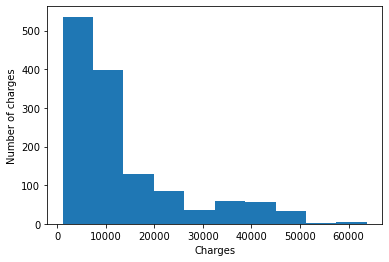

In [4]:
plt.hist(medical.charges)
plt.xlabel('Charges')
plt.ylabel('Number of charges')

In [5]:
np.mean(medical.charges)

13270.422265141257

In [6]:
np.std(medical.charges, ddof = 1)

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__investigate a CLT samping distribution, we are able to approximate the true population mean and of charges. And check probability of 12,000 in the distribution. Frequentist test: we dont know population mean and std ahead of time, we can use t distribution to approximate the mean of charges. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__95% confidence intervel is a good range of values to show how clase/far to the true mean of popultiaon. Because we want to check if average charges has fallen below 12000. One-sided intervals is more appropriate. We're only interested in a statitically significant difference in one direction, on either side of the population mean. 
The range of true mean of population charges are about (12836.64, 13936.96), having little difference based on different calculations. The actual avergage charge of the population has not fallen below 12000$

In [7]:
#calculate based on one-sided interval, pop.mean and t_value
p = 0.95
df = len(medical) - 1
t_value = t.ppf(p, df)
print(t_value)

1.6459941145571317


In [8]:
interval = t_value * (np.mean(medical.charges)/np.sqrt(len(medical)))

In [9]:
print('The 95% Confidence Interval using the t critical value is between ' + str(np.mean(medical.charges) - interval), 'and ' + str(np.mean(medical.charges)+interval))

The 95% Confidence Interval using the t critical value is between 12673.270165532937 and 13867.574364749576


In [10]:
#calculate based random sampling and t-value
seed(47)

sample_size = len(medical)
sample = np.random.choice(a= medical.charges, size = sample_size)
sample_mean = sample.mean()

t_critical = t.ppf(q = 0.95, df=sample_size -1)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation
sigma = sample_stdev/np.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.6459941145571317
Confidence interval:
(12836.636716125216, 13936.961034545937)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__Assumption is that there is no difference between insurance_group and non-insurace_group, It is also called null hypothesis. Alternaive hypothesis means that there is a difference between the two groups. The t-value is simply the estimate/standard error, and so can be interpreted as how far the estimate is away from 0, measured in the number of standard errors. 
t-statistic, fromed by the ratio of an estimate to its standard error.  For large
samples, values of above 2 or below −2 correspond to a two-sided P-value
of 0.05; exact P-values can be obtained from statistical software 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ Based on the critical value and p value, we will reject the hyphothesis that charges with or without insurance are the same. Therefore, charges with insurance is significanlty diffrent from the charges without insurance.

In [11]:
medical['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [12]:
#subset two groups
df_ins = medical.query('insuranceclaim == 1')
df_no_ins = medical.query('insuranceclaim == 0')

In [13]:
#calculate the mean of charges from the two groups
mu_X0 = np.mean(df_ins['charges'])
mu_X1 = np.mean(df_no_ins['charges'])

#N0 and N1
n0 = len(df_ins)
n1 = len(df_no_ins)

#S0 and S1
s0 = np.std(df_ins['charges'], ddof = 1)
s1 = np.std(df_no_ins['charges'], ddof = 1)

In [14]:
Sp = np.sqrt(((n0-1) * s0 **2 + (n1-1) * s1 **2)/(n0+n1-2))

In [15]:
t = (mu_X0 - mu_X1) / (Sp * np.sqrt(1/n0 + 1/n1))

In [16]:
(abs(t))

11.89329903087671

In [17]:
p_manual = (1 - stats.t.cdf(abs(t), df)) * 2

In [18]:
p_manual

0.0

In [19]:
#Calculate the T-test for the means of two independent samples of scores using scipy.stats.
stats.ttest_ind(df_no_ins.charges, df_ins.charges)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

In [20]:
#critical value If abs(t-statistic) <= critical value: Accept null hypothesis that the means are equal.
alpha = 0.05
df = n0 + n1 - 2
cv = stats.t.ppf(1.0 - alpha, df)
print('cv is ' + str(cv) + ' and less that ' + str(abs(t)), 'we will rejecte the hypythesis that means are equal')

cv is 1.6459949688112576 and less that 11.89329903087671 we will rejecte the hypythesis that means are equal


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__t-test estimate the difference based on the avalibale data, it is to determine the differences between two samples. z-test assumes that the variance is known. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test